In [1]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
#DataFlair - Read the data
df=pd.read_csv('../Downloads/parkinsons.data')
df.head(20)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [3]:
features = df.loc[:,df.columns!='status'].values[:,1:]
print(features)

[[119.992 157.302 74.997 ... 0.266482 2.301442 0.284654]
 [122.4 148.65 113.819 ... 0.33559 2.486855 0.368674]
 [116.682 131.111 111.555 ... 0.311173 2.342259 0.332634]
 ...
 [174.688 240.005 74.287 ... 0.158453 2.679772 0.131728]
 [198.764 396.961 74.904 ... 0.207454 2.138608 0.123306]
 [214.289 260.277 77.973 ... 0.190667 2.555477 0.148569]]


In [4]:
labels = df.loc[:,'status'].values

In [5]:
print(labels[labels == 1].shape[0], labels[labels == 0].shape[0])

147 48


In [6]:
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(features)
y = labels

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

In [8]:
model = XGBClassifier()
model.fit(x_train,y_train)

[21:59:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [9]:
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

94.87179487179486


Text(0.5, 42.0, 'Predicted')

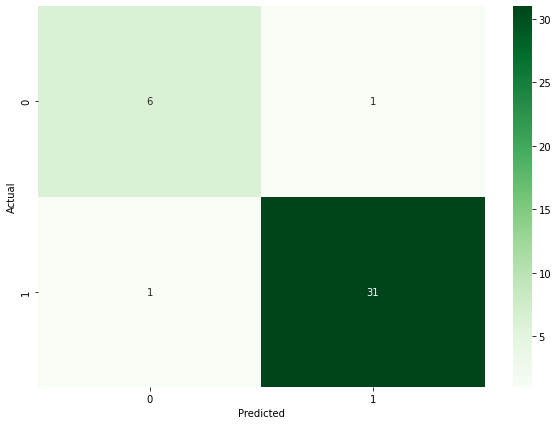

In [10]:
import seaborn as sn
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap="Greens", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.97      0.97      0.97        32

    accuracy                           0.95        39
   macro avg       0.91      0.91      0.91        39
weighted avg       0.95      0.95      0.95        39



In [12]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

71.7948717948718


              precision    recall  f1-score   support

           0       0.36      0.71      0.48         7
           1       0.92      0.72      0.81        32

    accuracy                           0.72        39
   macro avg       0.64      0.72      0.64        39
weighted avg       0.82      0.72      0.75        39



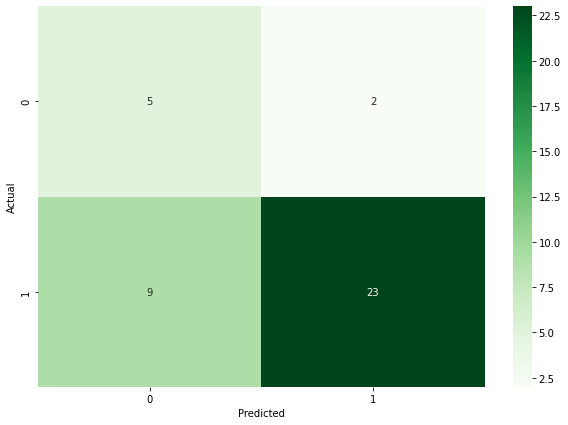

In [13]:
import seaborn as sn
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,cmap="Greens", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [14]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

97.43589743589743


              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.97      1.00      0.98        32

    accuracy                           0.97        39
   macro avg       0.98      0.93      0.95        39
weighted avg       0.98      0.97      0.97        39



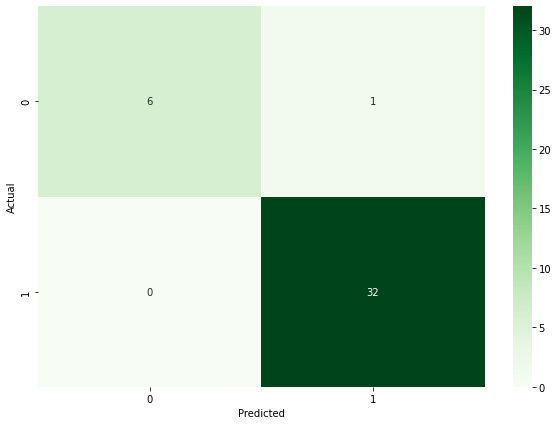

In [15]:
import seaborn as sn
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,cmap="Greens", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))